# End-to-End Machine Learning Project

In this chapter you will work through an example project end to end, pretending to be a recently hired data scientist at a real estate company. Here are the main steps you will go through:
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine learning algorithms.
5. Select a model and train it
6. Fine-tune your model.
7. Present your solution
8. Launch, monitor, and maintain your system.

## Working with Real Data

When you are learning about Machine Leaning, it is best to experimentwith real-world data, not artificial datasets.

Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:
* Popular open data repositories:
    - [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
    - [Kaggle](https://www.kaggle.com/datasets) datasets
    - Amazon's [AWS](https://registry.opendata.aws/) datasets
* Meta Portals:
    - [Data Portals](http://dataportals.org/)
    - [OpenDataMonitor](http://opendatamonitor.eu/)
    - [Quandl](http://quandl.com)

## Frame the Problem

The problem is that your model' output (a prediction of a district's median housing price) will be fed to another ML system along with many other signals*. This downstream will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

```
                                                                                                                        Other Signals
                                                                                                                            |
Upstream Components --> (District Data) --> [District Pricing prediction model](your component) --> (District prices) --> [Investment Analaysis] --> Investments
```


### Pipelines

A sequence of data processing components is called a **data pipeline**. Pipelines are very common in Machine Learning systems, since a lot of data needs to manipulated to make sure the machine learning model/algorithms understands the data, as algorithms understand only numbers.

## Download the Data:

You could use your web browser and download the data, but it is preferabble to make a function to do the same.

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """
    Function to download the housing_data
    """
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd
import numpy as np
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()

housing = load_housing_data()

## Take a quick look at the Data Structure

Each row represents one district. There are 10 attributes:
```
longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity
```

The `info()` method is useful to give a quick description of the data.

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


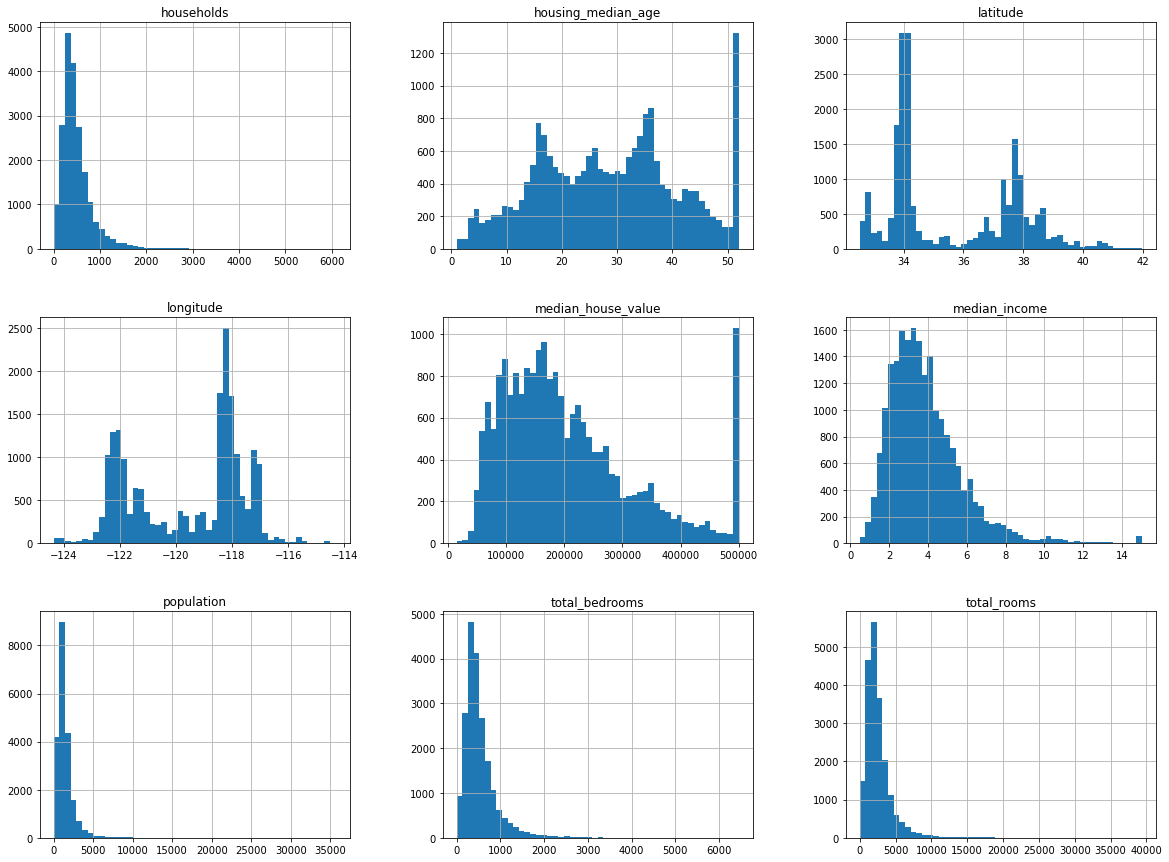

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show();

> 🔑 **Note:** The `hist()` method relies on Matplotlib, which in turn relies on a user-specified graphical backend to draw on your screen. The simplest option is to use Jupyter's magic command `%matplotlib inline`. This tells jupyter to set up Matplotlib so that it uses Jupyter's own backend. Note that calling `plot()` is optional as Jupyter does this automatically.

#### There are few things you might notice in these histograms:

1. First the median income attribute does not look like it is expressed in US dollars (USD). The data has been scaled at 15 for higher median incomes and at 0.5 for lower median incomes. The numbers represent roughly tens of thousands of dollars(e.g., 3 actually means about $30,000). Working with oreoricessed attributes is common in Machine learning and it is not necessarily a problem. But you should try to understand how the data was computed.
2. The housing median age and the median house value were also capped.
3. These attributes have very different scales.
4. Many histograms of this dataset are *tail-heavy* i.e., they extend much farther to the right of the median than to the left. This may make it bit harder for Machine Learning Algorithms to unerstand patterns. We will try transfprming these attributes later on to have more bell shaped-distributions.

> ‼️ **Note:** Wait! Before you look at the data any further, you need to create a test set, put it aside and never look at it.

## Create a Test Set

Scikit-learn provides a few functions to split datasets into multiple subsets in various ways:

1. The `train_test_split()` function is the simplest and most used function from scikit-learn for this purpose.
2. For Stratified sampling, `StartifiedShuffleSplit()` would be useful
3. And probably so many more functions...

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_i, test_i in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_i]
    strat_test_set = housing.loc[test_i]

strat_train_set.shape

(16512, 11)

In [13]:
# Now remove the income_cat attribute so the data is back to its original state
for _ in (strat_train_set, strat_test_set):
    _.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain More Insights

So far you have only taken a quick glance at the data to get a general understanding of the kind of data you are manipulating. Now the goal is to go into a lttle more depth.

First, make sure you have put the test set aside and you are only exploring the training data set. In our case the set is quite small, so you can work directly on the full set. Let's create a copy so that you can play woth it without harming the training set:

In [14]:
housing = strat_train_set.copy()

### Visualizing Geopgraphical Data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot pf all districts to visualize the data.

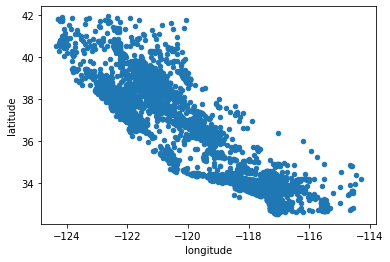

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude");

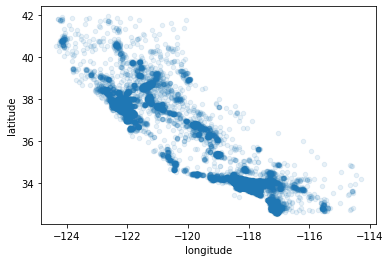

In [16]:
# Setting the alpha optin to 0.1 makes it easier to visualize the places where there is a high -density of data points.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

Now from the above graph, we can clearly see the high-density areas. Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out.

Now let's look at the housing prices. The radius of each circle represents the district's populaiton (option `s`), and the color represents the price (option `c`). We will use a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices):

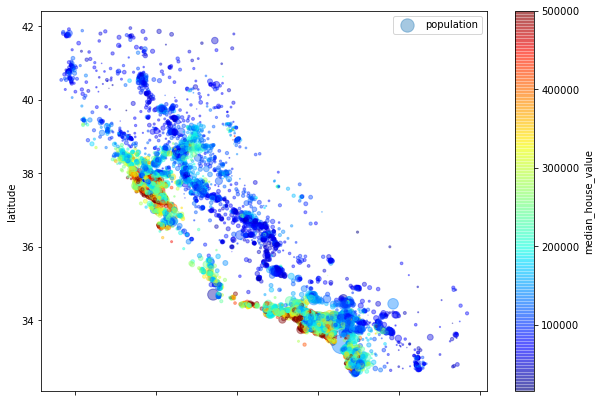

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

### Looking for Correlations

Since the dataset is not too large, you can easily compute the *standard correlation coeffecient* (also known as *Pearson's r*) between every pair of attributes using the `corr()` method

In [18]:
corr_matrix = housing.corr()

In [19]:
# Now let's look at how much each attribute correlates with the median house value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### The Standard Correlation Coeffecient

The correlation coeffecient ranges from -1 to 1. When it is close to 1, it means that there is strong positive correlation. While, when the coeffecient is close to -1, it means there is a strong negative correlation. Finally coeffecients close to 0 mean that there is no linear correlation.

<img src="Fig..png" alt="Standard correlation coeffecients of various Datasets"/>

> 🔑 **Note:** The correlation coeffecient only measures linear correlations ("if x goes up, then y generally goes up/down"). It may completely miss out on nonlinear relationships (e.g., "if x is close to 0, then y generally goes up"). Note how all the plots of the bottom row have a correlation coeffecient equal to 0, despite the fact that that their axes are clearly not independent: these examples are nonlinearly correlated.

Another way to check for correlation between attributes is to use the pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute.Since there are 11 numerical attributes, you would get 11^2 = 121 plots, which too large to fit inour page. So let's just focus on a few promising attributes that seem most correlated with median housing value:

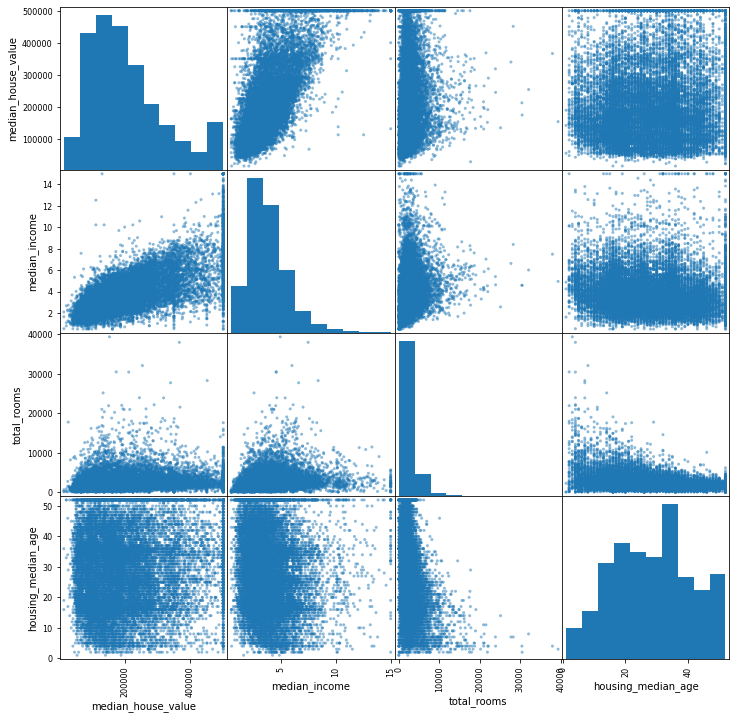

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 12));

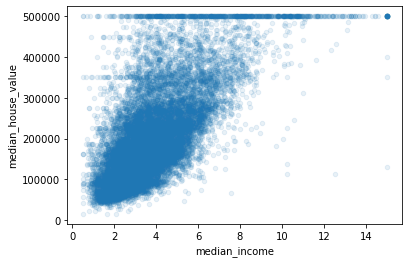

In [21]:
# The most promising attribute to predict the median house value is the median income
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=.1);

This plot reveals a few things:
1. The correlation is indeed very strong as you can see clearly the upward trend, and the points are not too dispersed.
2. The price cap that we noticed earlier is clearly visible as a horizontal line at $500,000. There are a few more less-obvious lines that you may want to remove to prevent your algorithms from learning to reproduce these data quirks.

## Experimenting with Attribute Combinations

Till now, you identified a few data quirks that you may want to clean up before feeding the data to the Machine Learning algorithms, and you found out interesting correlations between attributes.

One last thing you may want to do before preparing the data for Machine learning algorithms, is to try out various attribute combinations.

For Example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household... and so on. Let's create these new attributes:

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Hey, not bad! The new attributes have some more correlation

## Prepare the Data for Machine Learning Algorithms

It's time to prepare the data for your Machine Learning algorithm. Instead of doing this manually, you should write functions for this purpose, for several good reasons:
- This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fres dataset).
- You will gradually build a library of transformations functions that you can reuse in your future projects.
- You can use these functions in your live system to transform the new data before feeding it to your algorithms.
- This will make it possible for you to easily try various transformations and see what works best.

In [25]:
# Let's revert to a clean training set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Most Machine Learning algorithms cannot work with data that have missing features, so let's create a few functions to take care of them. We say earlier that the `total_bedrooms` attribute has some missing values, so let's fix this. You have three options to do so:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, the mode, etc.)

You can accomplish these easily using DataFrame's `dropna()`, `drop()`, `fillna()` methods:

In [26]:
# housing.dropna(subset=["total_bedrooms"])
# housing.drop("total_bedrooms", axis=1)
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

But we'll be using the Scikit-Learning platform.

Scikit-Learn provides a handy class to take care of the missing values: `SimpleImputer`.

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
# Since the median can be computed only on numerical attributes, drop the ocean_proximity attribute which is a String
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
# The result is a plain numpy array, converting into a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Handling Text and Categorical Attributes
So far we have only dealt with numerical attributes, but now let's look at text attributes. In this dataset, there is just one: the `ocean_proximity` attribute. Let's look at its value fo first 10 instances:

In [29]:
# First 10 instances
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [30]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [31]:
# It's not arbitary text. Therefore, it is categorical text.

In [32]:
# One hot encoding the data
from sklearn.preprocessing import OneHotEncoder
cat_enc = OneHotEncoder()
housing_cat_one_hot = cat_enc.fit_transform(housing_cat)
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_one_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
cat_enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Trasformers

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessely with Scikit-Learn functionalitites (such as `pipelines`), all you need to do is create a class and implement three methods: `fit()`, `transform()`, and `fit_transform()`.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [36]:
attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

One of the most imprtant features you need to apply to your data is *feature scaling*. With a few exceptions, Machine Learning algorithms don't perform well numerical attributes have very different scales. There are two common ways to get all the attributes to have the same scale, namely, *min-max scaling* and *standardization*.

Min-Max Scaling (also known as *Normalization*) is the simplest: the values are shifted to a range of 0-1.

Standardization is using standard deviation.

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in an order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with sequences of transformations. Here is a small pipeline for the numerical attributes:

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [38]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [39]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

At last!😃 You framed the problem, you got your data and explored it, you sampled a training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine learning slgorithms automatically. You are now ready to select and train a Machine Learning Model.💗

### Training Machine Learning Models on the training set and evaluating on the Same

The following experiments will be implemented:
1. Linear Regression Model
2. Decision Tree Regression Model
3. Random Forest Regression Model

In [40]:
# 1. Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error
lin_reg_predictions = lin_reg.predict(housing_prepared)
lin_reg_predictions[:10]

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879, 154295.07624519, 426711.9315643 , 228002.94602374,
       139801.43738593,  30128.00152011])

In [42]:
lin_reg_results = np.sqrt(mean_squared_error(housing_labels, lin_reg_predictions))
lin_reg_results

68628.19819848923

In [44]:
# 2. Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
tree_reg_predictions = tree_reg.predict(housing_prepared)
tree_reg_predictions[:10]

array([286600., 340600., 196900.,  46300., 254500., 127900., 500001.,
       140200.,  95000., 500001.])

In [47]:
tree_reg_results = np.sqrt(mean_squared_error(housing_labels, tree_reg_predictions))
tree_reg_results

0.0

In [48]:
# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [50]:
forest_reg_predictions = forest_reg.predict(housing_prepared)
forest_reg_predictions[:10]

array([261595.  , 323674.01, 218778.  ,  50213.  , 235477.  , 128801.  ,
       498525.97, 171066.  ,  98600.  , 371011.66])

In [51]:
forest_reg_results = np.sqrt(mean_squared_error(housing_labels, forest_reg_predictions))
forest_reg_results

18840.727287996095

### Better Evaluation using Cross-Validation

A great feature of Scikit-Learn is its *K-fold cross-validaation* feature. The following code randomy splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training other 9 folds. The result is an array containing the 10 evaluation scores.

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

71032.35551984902

> 🔑 **Note:** Scikit-Learn's cross-validation features expect a utility function (grater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [54]:
# Function to display the scores of any model
from sklearn.model_selection import cross_val_score

def display_scores(model):
    scores = cross_val_score(model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print(f"Scores: {rmse_scores}")
    print(f"Scores: {rmse_scores.mean()}")
    print(f"Standard deviation: {rmse_scores.std()}")

In [55]:
display_scores(lin_reg)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Scores: 69052.46136345083
Standard deviation: 2731.674001798349


In [56]:
display_scores(tree_reg)

Scores: [69308.46760938 67506.3389682  70523.01095509 69585.27357858
 71676.03622911 76103.05154245 71369.85888934 71092.66290043
 77226.24895698 70667.22489631]
Scores: 71505.8174525871
Standard deviation: 2832.981875332328


In [ ]:
display_scores(forest_reg)